In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the file
df= pd.read_csv('Life_Expectancy_Data.csv')

# Inspect the dataset
print (df.shape)
print(df.info())
print(df.head())
print(df.describe())

(2938, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio    

In [3]:
# Check for missing values
df= df.dropna()
print ("Total missing values:\n",df.shape)

# Check for duplicate rows
duplicates= df.duplicated().sum()
print("\nTotal Duplicates:\n",duplicates)

# Format the column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Show the cleaned column names
df.columns.tolist()

Total missing values:
 (1649, 22)

Total Duplicates:
 0


['Country',
 'Year',
 'Status',
 'Life_expectancy',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under-five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'Income_composition_of_resources',
 'Schooling']

In [4]:
# Save the cleaned dataset
df.to_csv('life_expectancy_cleaned_dataset.csv', index=False)

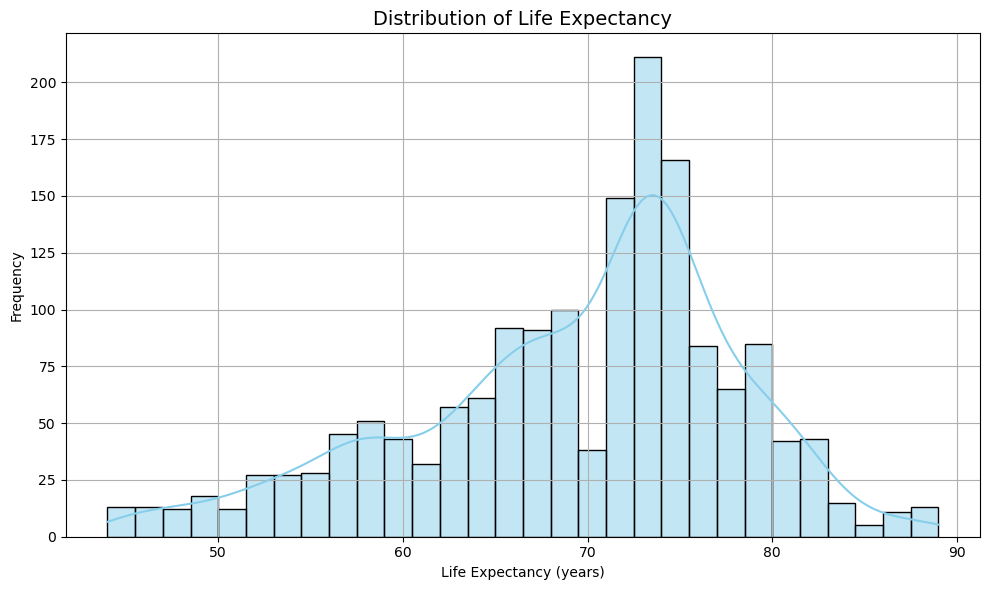

In [5]:
## Exploratory Data Analysis (EDA)

# Plotting Life Expectancy Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Life_expectancy'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy', fontsize=14)
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/Life_expectancy_distribution.png')
plt.show()

In [6]:
# Outliers Detection and Handling
from scipy import stats

# Keep only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate z-scores
z_scores = np.abs(stats.zscore(numeric_df))

# Set threshold
threshold = 3

# Get all rows where all z-scores are below threshold
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

                                    **HYPOTHESIS TESTING**

Hypothesis: Does life expectancy differ significantly between Developed and Developing countries?

Test: Welch's T-Test hypothesis

Assumption:- H0: Developed = Developing (no difference in means)
             H1: Developed ≠ Developing (there is a difference) 

In [7]:
## STATISTICAL ANALYSIS
# Hypothesis Testing

from scipy.stats import ttest_ind

# Split groups
dev = df_no_outliers[df_no_outliers['Status'] == 'Developed']['Life_expectancy']
deving = df_no_outliers[df_no_outliers['Status'] == 'Developing']['Life_expectancy']

# T-test
t_stat, p_val = ttest_ind(dev, deving, equal_var=False)

print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_val:.3f}")

T-Statistic: 24.319, P-Value: 0.000


In [8]:
# Linear Regression (Life Expectancy vs. Schooling)

import statsmodels.api as sm

# Independent and dependent vars
X = df_no_outliers['Schooling']
y = df_no_outliers['Life_expectancy']

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1689.
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          1.54e-236
Time:                        17:40:08   Log-Likelihood:                -3929.0
No. Observations:                1290   AIC:                             7862.
Df Residuals:                    1288   BIC:                             7872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1228      0.676     63.835      0.0

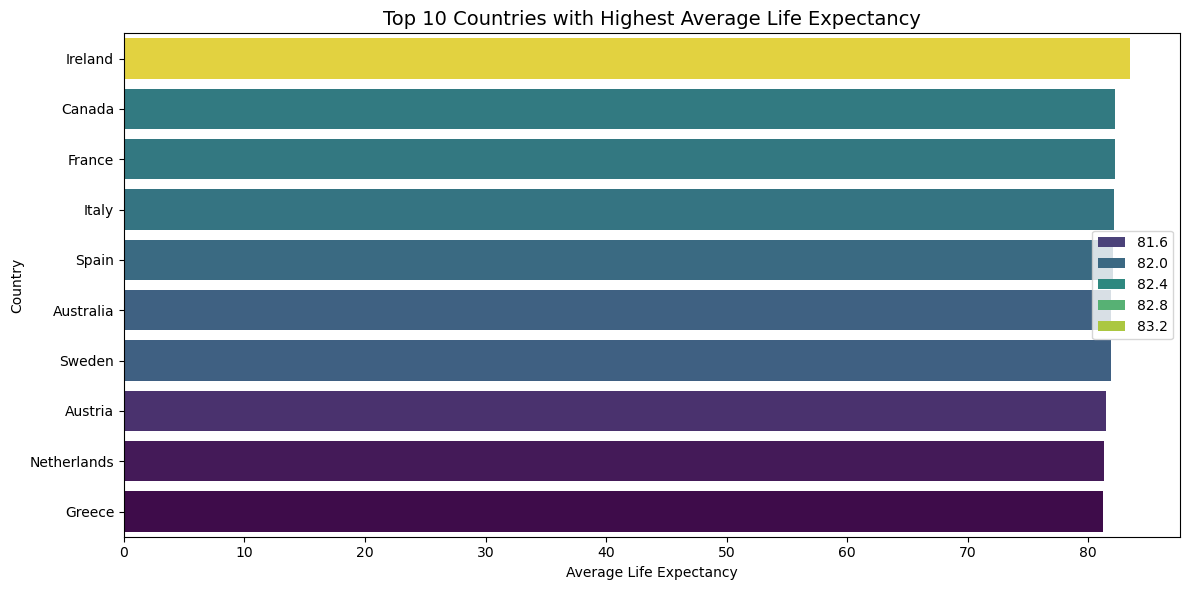

In [9]:
# Countries with the highest life expectancy rates

top10 = df.groupby('Country')['Life_expectancy'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10.values, y=top10.index, hue=top10.values, palette='viridis')
plt.title('Top 10 Countries with Highest Average Life Expectancy', fontsize=14)
plt.xlabel('Average Life Expectancy')
plt.ylabel('Country')
plt.tight_layout()

# Save and show
plt.savefig('plots/Highest_Life_expect_countries.png')
plt.show()

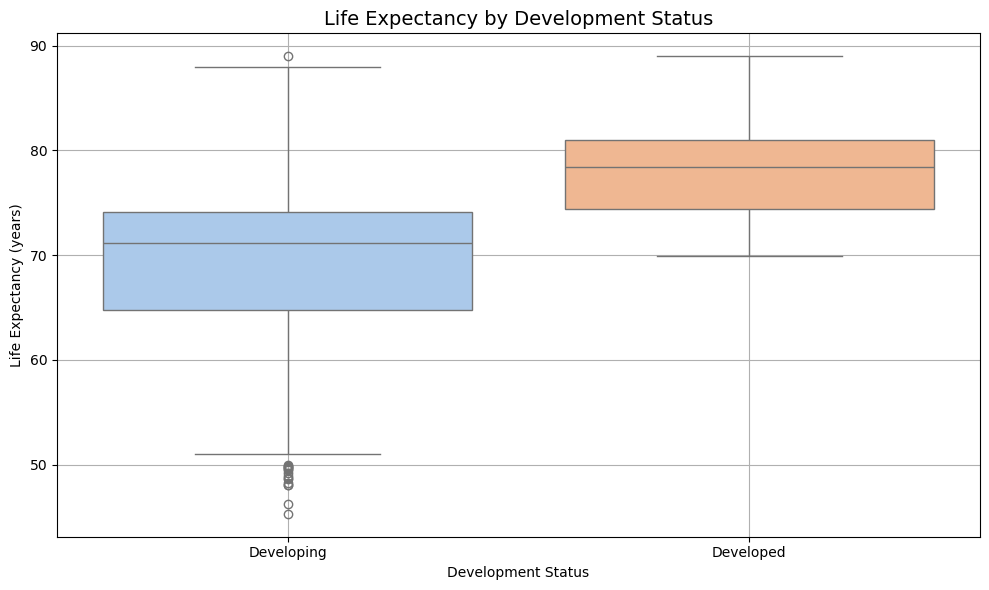

In [10]:
# Life Expectancy by Development Status (Developed vs Developing)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='Status', y='Life_expectancy', hue='Status',palette='pastel')
plt.title('Life Expectancy by Development Status', fontsize=14)
plt.xlabel('Development Status')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/Life_expect_development.png')
plt.show()

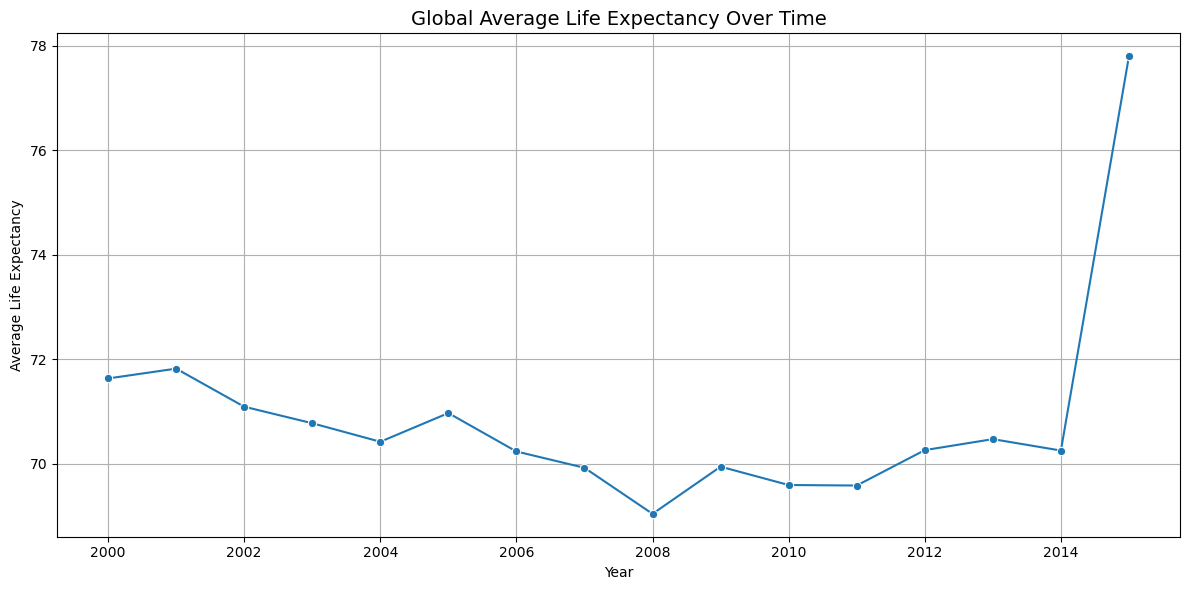

In [11]:
# Year-wise life expectancy trend

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_no_outliers, x='Year', y='Life_expectancy', estimator='mean', errorbar=None, marker='o')
plt.title('Global Average Life Expectancy Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/Average_Life_expect.png')
plt.show()

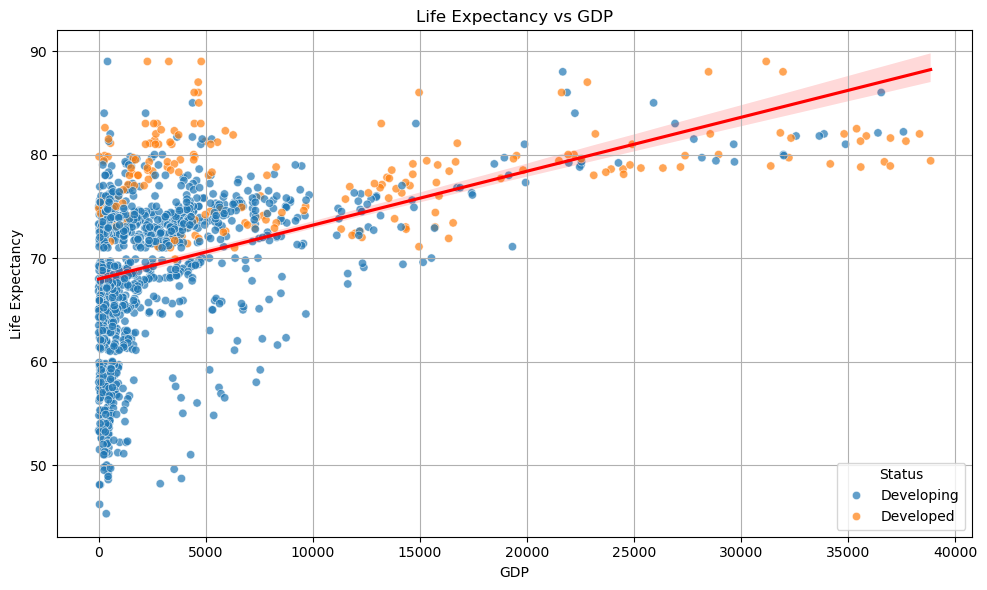

In [12]:
# Bivariate Analysis
# Life expectancy vs. GDP

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_no_outliers, x='GDP', y='Life_expectancy', hue='Status', alpha=0.7)
sns.regplot(data=df_no_outliers, x='GDP', y='Life_expectancy', scatter=False, color='red')
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/GDP_vs._LE.png')
plt.show()

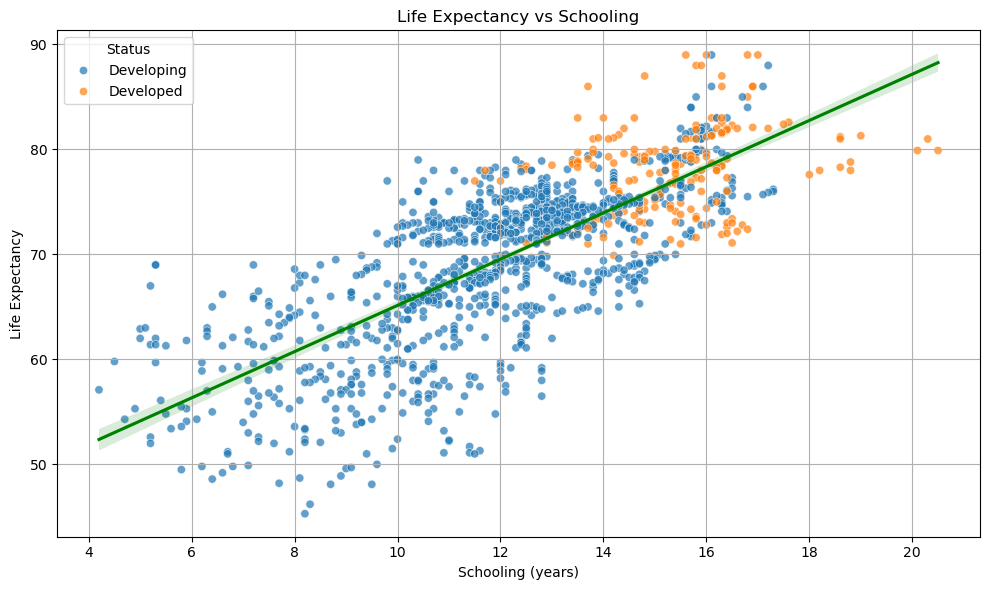

In [13]:
# Life Expectancy vs. Schooling

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_no_outliers, x='Schooling', y='Life_expectancy', hue='Status', alpha=0.7)
sns.regplot(data=df_no_outliers, x='Schooling', y='Life_expectancy', scatter=False, color='green')
plt.title('Life Expectancy vs Schooling')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/Schooling_vs._LE.png')
plt.show()

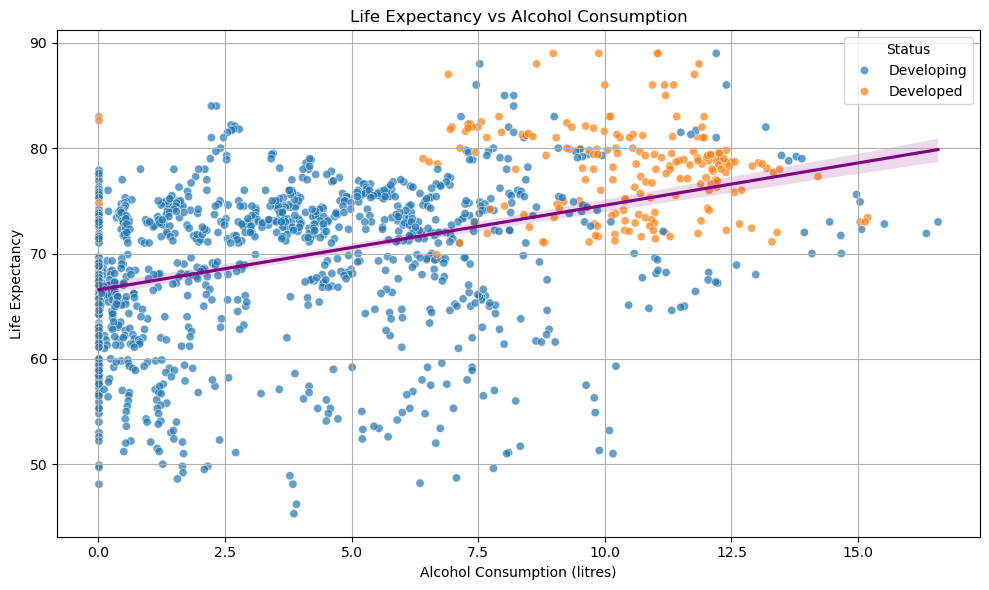

In [14]:
# Life Expectancy vs. Alcohol consumption

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_no_outliers, x='Alcohol', y='Life_expectancy', hue='Status', alpha=0.7)
sns.regplot(data=df_no_outliers, x='Alcohol', y='Life_expectancy', scatter=False, color='purple')
plt.title('Life Expectancy vs Alcohol Consumption')
plt.xlabel('Alcohol Consumption (litres)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('plots/Alcohol_consump_vs._LE.png')
plt.show()

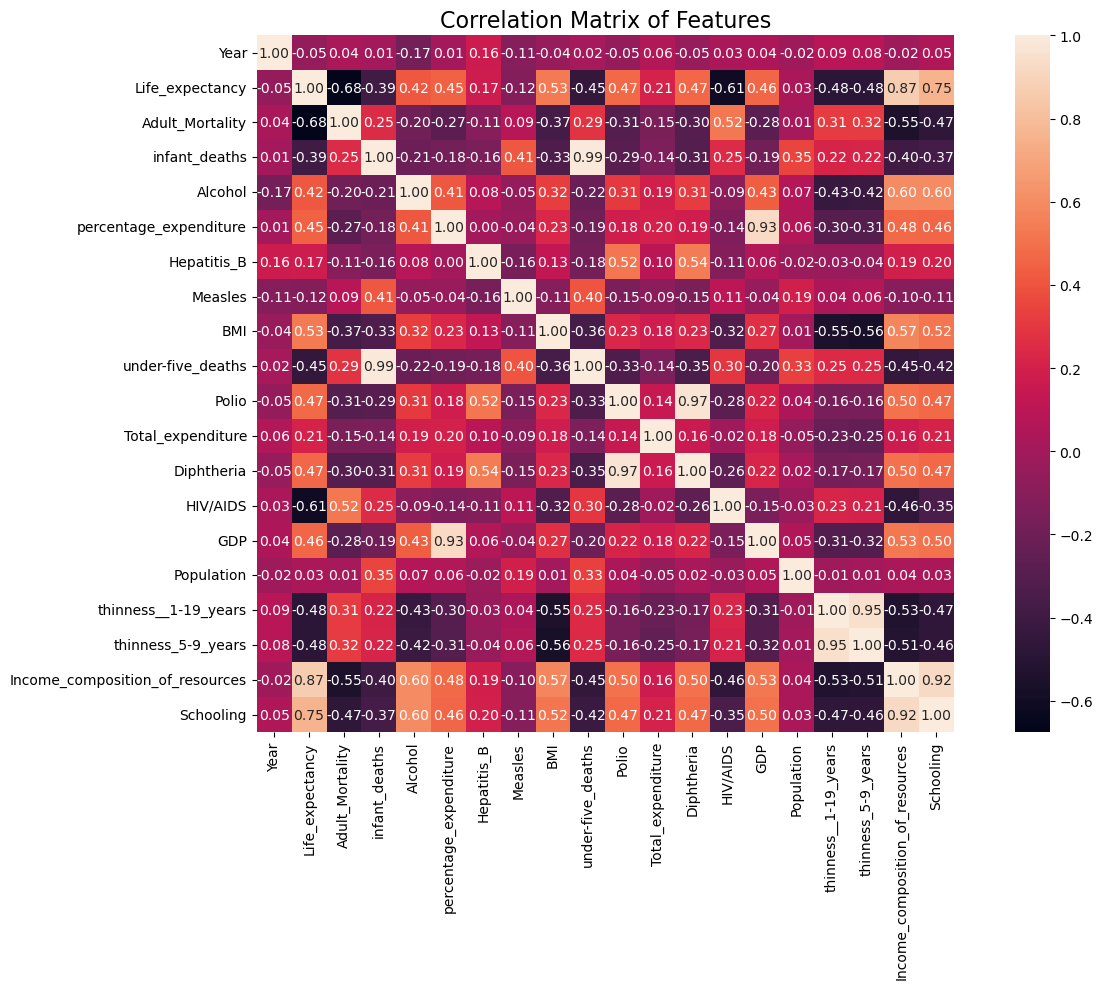

In [15]:
# Correlation Heatmap

plt.figure(figsize=(14, 10))
correlation_matrix = df_no_outliers.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()

# Save and show
plt.savefig('plots/Correlation_heatmap.png')
plt.show()

As the above heatmap shows high level of multicollinearity between certain variables, PCA technique needs to be applied to overcome that. 

In [16]:
# Variance Inflation Factor (VIF) to check for the multicollinearity in the heatmap

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF works only on numeric values
X_vif = df_no_outliers.select_dtypes(include='number').drop(columns='Life_expectancy')
X_vif = add_constant(X_vif)  # Added constant term for intercept

vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_df)

                            Feature            VIF
0                             const  284746.527104
1                              Year       1.190237
2                   Adult_Mortality       1.725571
3                     infant_deaths      84.445176
4                           Alcohol       2.047264
5            percentage_expenditure       7.713795
6                       Hepatitis_B       1.547262
7                           Measles       1.259054
8                               BMI       1.864474
9                 under-five_deaths      89.182668
10                            Polio      15.567702
11                Total_expenditure       1.169199
12                       Diphtheria      16.096022
13                         HIV/AIDS       1.715587
14                              GDP       8.099062
15                       Population       1.231858
16             thinness__1-19_years      10.618550
17               thinness_5-9_years      10.639635
18  Income_composition_of_resou

[0.32360006 0.11945477]


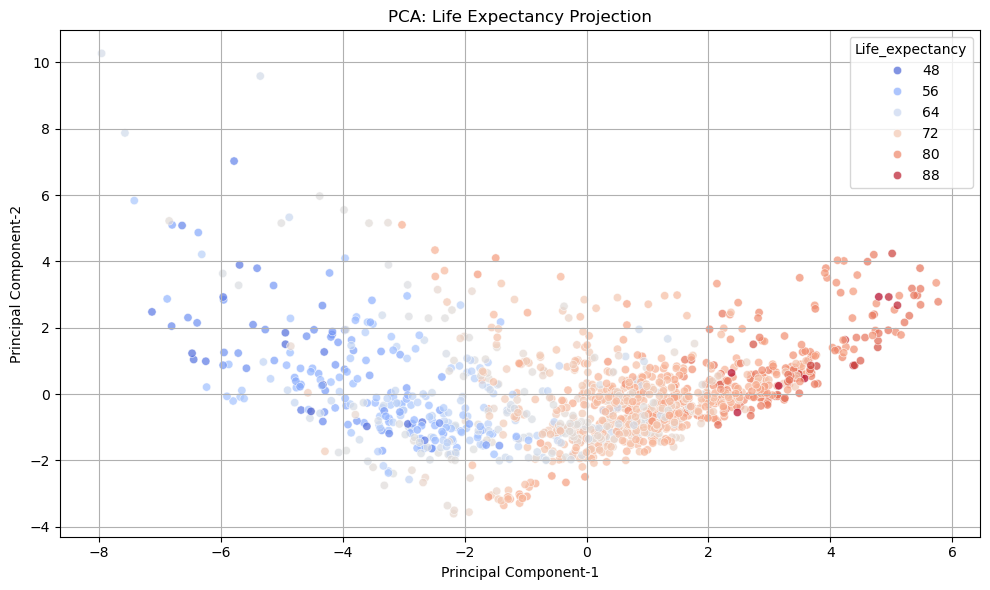

In [20]:
# PCA (Principal Component Analysis) to resolve the issue of multicollinearity

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Only numeric features
X_num = df_no_outliers.select_dtypes(include='number').drop(columns='Life_expectancy')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Life_expectancy'] = df_no_outliers['Life_expectancy'].values

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Life_expectancy', palette='coolwarm', alpha=0.7)
plt.title('PCA: Life Expectancy Projection')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.grid(True)
plt.tight_layout()
print(pca.explained_variance_ratio_)

# Save and show
plt.savefig('plots/PCA.png')
plt.show()

In [23]:
# Save the new dataset for further analysis
df_no_outliers.to_csv('new_df.csv', index=False)

df_no_outliers.shape

(1290, 22)